# Machine learning on Breast Cancer

## Introduction

Cancerous cells are known for invading and destroying healthy tissues and surrounding organs hence, cancer is one of the leading causes of mortality worldwide (Rabiei, 2022). Cancers can grow in any part of the body and are usually categorised based on the part they originate from. Over the years, cancer has ben found to be a complicated disease because of how fast it grows, invades and also spreads (metastasizes) to other body parts (Wassim, Elarbi and Khadija, 2022).

Among the prevalent cancer types, breast cancer is the most occurring form, especially in women. Over the years, its incidence rate has increased, however mortality from this can be significantly decreased through timely screening and early treatment (Rabiei, 2022). Screening can be done through mammography, MRI, CT scan, biopsy and fine needle aspiration cytology. However, more advanced and detailed methods of diagnosing and treating breast cancer more effectively are been sought, which draws attention to the role and application of machine learning in improving breast cancer diagnostics and outcomes (Okebule et al., 2023). 

The focus of this project is on the use of machine learning algorithms to diagnose and get information n different complex conditions. A dataset composed of 32 columns and various  measurements will be utilised with the aim of internalising various techniques such as pre-processing a dataset, exploratory data analysis, machine learning analyses and workflow identification.

## 1.0 Pre-process the dataset and perform an Exploratory Data Analysis (EDA) of the data

Exploratory Data Analysis is a level of data analysis that aids visual representation of data and identification of patterns from a dataset to ascertain hidden knowledge embedded in the dataset (Tran, Le and Shi, 2022). It extracts knowledge from raw data. In medical, it assists medical professionals and researchers obtain data about patients through text and image format which aids comprehension and better informed decision-making (Sweetlin and Saudia, 2021). Therefore, in this analysis, we will be carrying out some EDAs as requested in the brief.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
df = pd.read_csv("/Users/mac/Desktop/USW Data Science/Machine Learning & Deep Learning/Assessment/MS4S16_Dataset.csv")

In [2]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    float64
 1   diagnosis                568 non-null    object 
 2   radius_mean              566 non-null    float64
 3   texture_mean             565 non-null    float64
 4   perimeter_mean           567 non-null    float64
 5   area_mean                566 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         567 non-null    float64
 8   concavity_mean           567 non-null    float64
 9   concave points_mean      563 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   567 non-null    float64
 12  radius_se                565 non-null    float64
 13  texture_se               563 non-null    float64
 14  perimeter_se             5

### 1.1 Taking care of any missing, duplicated or outlier values

In [3]:
# Check for missing values
print(df.isnull().sum())

id                          3
diagnosis                   3
radius_mean                 5
texture_mean                6
perimeter_mean              4
area_mean                   5
smoothness_mean             3
compactness_mean            4
concavity_mean              4
concave points_mean         8
symmetry_mean               3
fractal_dimension_mean      4
radius_se                   6
texture_se                  8
perimeter_se                3
area_se                     6
smoothness_se               6
compactness_se              7
concavity_se                8
concave points_se           9
symmetry_se                 8
fractal_dimension_se        7
radius_worst               13
texture_worst              21
perimeter_worst             6
area_worst                  4
smoothness_worst            9
compactness_worst           4
concavity_worst             3
concave points_worst        6
symmetry_worst              4
fractal_dimension_worst    13
dtype: int64


In [4]:
# Drop duplicates
df = df.drop_duplicates()

# Remove rows where all columns are empty
df.dropna(axis=1, how='all', inplace=True)

# Remove rows where all rows are empty
df.dropna(axis=0, how='all', inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

id                          0
diagnosis                   0
radius_mean                 2
texture_mean                3
perimeter_mean              1
area_mean                   2
smoothness_mean             0
compactness_mean            1
concavity_mean              1
concave points_mean         5
symmetry_mean               0
fractal_dimension_mean      1
radius_se                   3
texture_se                  5
perimeter_se                0
area_se                     3
smoothness_se               3
compactness_se              4
concavity_se                5
concave points_se           6
symmetry_se                 5
fractal_dimension_se        4
radius_worst               10
texture_worst              18
perimeter_worst             3
area_worst                  1
smoothness_worst            6
compactness_worst           1
concavity_worst             0
concave points_worst        3
symmetry_worst              1
fractal_dimension_worst    10
dtype: int64


Exclude the text attribute from the imputation because mean can only be calculated on numerical attributes:

In [5]:
# Columns to exclude from imputation
exclude_columns = ['diagnosis']

# Impute missing values with mean for columns other than 'id' and 'diagnosis' as they are categorical data with no missing values
imputer = SimpleImputer(strategy='mean')
numeric_columns = df.columns.difference(exclude_columns)
df[numeric_columns] = pd.DataFrame(imputer.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Drop any remaining rows with missing values incase any exist
df = df.dropna()

# Verify that there are no more missing values
print(df.isnull().sum())

print(df.info())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entri

In [6]:
from sklearn.neighbors import LocalOutlierFactor

# Select features for outlier detection (excluding non-numeric columns like 'diagnosis' and 'id')
outlier_features = df.select_dtypes(include='number').columns

# Extract the data for outlier detection
df_outlier_data = df[outlier_features]

# Create and fit the Local Outlier Factor (LOF) model
detect_outlier = LocalOutlierFactor()
outlier_labels = detect_outlier.fit_predict(df_outlier_data)

# Add the outlier labels to your dataframe
df['outlier'] = outlier_labels

In [7]:
from scipy import stats

# Determine Z-scores for every column of numbers
z_scores = stats.zscore(df.select_dtypes(include=['float64']))

# Establish a cutoff point at which values are regarded as outliers (e.g., Z-score > 3 or < -3).
threshold = 3

# Find the outlier rows
outlier_rows = (z_scores > threshold).any(axis=1)

# Display the number of outliers detected
num_outliers = outlier_rows.sum()
print(f"Number of outliers detected: {num_outliers}")

Number of outliers detected: 80


In [8]:
# Filter out rows identified as outliers and overwrite the original DataFrame
df = df[~outlier_rows]

# Display the shape of the modified DataFrame
print(f"Shape of DataFrame after removing outliers: {df.shape}")

# reseting the index of the modified DataFrame
df.reset_index(drop=True, inplace=True)

Shape of DataFrame after removing outliers: (482, 33)


In [9]:
# Remove the 'outlier' column
df = df.drop('outlier', axis=1)

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,843786.0,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,844359.0,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,925292.0,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
478,926424.0,B,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
479,926682.0,B,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
480,926954.0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [10]:
from scipy.stats import shapiro

# List of features to check for normality
features_to_check = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Iterate through features
for feature in features_to_check:
    stat, p_value = shapiro(df[feature])
    
    # Print results
    print(f"Shapiro-Wilk Test for '{feature}':")
    print(f"Statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check the significance level using 0.05
    alpha = 0.05
    if p_value > alpha:
        print(f"The data for '{feature}' appears to be normally distributed, therefore we do not reject the null hypothesis")
    else:
        print(f"The data for '{feature}' does not appear to be normally distributed, therefore we reject the null hypothesis)")

    print("\n" + "="*40 + "\n")

Shapiro-Wilk Test for 'radius_mean':
Statistic: 0.9548385143280029
P-value: 5.5832140993805623e-11
The data for 'radius_mean' does not appear to be normally distributed, therefore we reject the null hypothesis)


Shapiro-Wilk Test for 'texture_mean':
Statistic: 0.5580664873123169
P-value: 4.429354549394537e-33
The data for 'texture_mean' does not appear to be normally distributed, therefore we reject the null hypothesis)


Shapiro-Wilk Test for 'perimeter_mean':
Statistic: 0.952892005443573
P-value: 2.8477113028779755e-11
The data for 'perimeter_mean' does not appear to be normally distributed, therefore we reject the null hypothesis)


Shapiro-Wilk Test for 'area_mean':
Statistic: 0.8968027830123901
P-value: 1.6774526336499632e-17
The data for 'area_mean' does not appear to be normally distributed, therefore we reject the null hypothesis)


Shapiro-Wilk Test for 'smoothness_mean':
Statistic: 0.9953056573867798
P-value: 0.15452222526073456
The data for 'smoothness_mean' appears to be n

From the above result, after conducting our normality test using shapiro wilk, setting our alpha value as 0.05, therefore we were able to see that only smoothness_mean is normally distributed while other features are not normally distributed. Hence, we will need to normalized all of the feature except smoothness_mean before carrying out any form of analysis on our data.

### 1.2 Handling Text and Categorical Attributes

We have to deal with the Categorical Variables Diagnosis using One-hot encoding. Although, we have other ways to deal with categorical variables but I used this due to the fact that the variables are nominal and not Ordinal

Now let's preprocess the categorical input feature, diagnosis:

In [11]:
#Inspecting the Categorical variable diagnosis
df['diagnosis'].value_counts()

B    316
M    166
Name: diagnosis, dtype: int64

In [12]:
diagnosis_new = pd.DataFrame(['B', 'M'])

In [13]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

diagnosis_one_hot = one_hot_encoder.fit_transform(diagnosis_new)

In [14]:
diagnosis_one_hot
diagnosis_one_hot.toarray()

array([[1., 0.],
       [0., 1.]])

In [15]:
temp = pd.get_dummies(df['diagnosis']) #one hot encoding
temp

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
477,1,0
478,1,0
479,1,0
480,0,1


Now let's merge the encoded variable together with our data frame using concartination in pandas

In [16]:
df = pd.concat([temp, df], axis=1)
df

,B,M,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,0,1,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,0,1,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,0,1,843786.0,M,12.45,15.70,82.57,477.1,0.12780,0.17000,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,0,1,844359.0,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,1,0,925292.0,B,14.05,27.15,91.38,600.4,0.09929,0.11260,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
478,1,0,926424.0,B,21.56,22.39,142.00,1479.0,0.11100,0.11590,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
479,1,0,926682.0,B,20.13,28.25,131.20,1261.0,0.09780,0.10340,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
480,0,1,926954.0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


### 1.3 Producing appropriate and informative plots and tables for an exploratory analysis

The Plots below are the diagramatic representation of all the factors in the data set including the ID and one hot encoded Target variables (M & B). This gives us an adequate inside into the distribution of each features of the dataset.

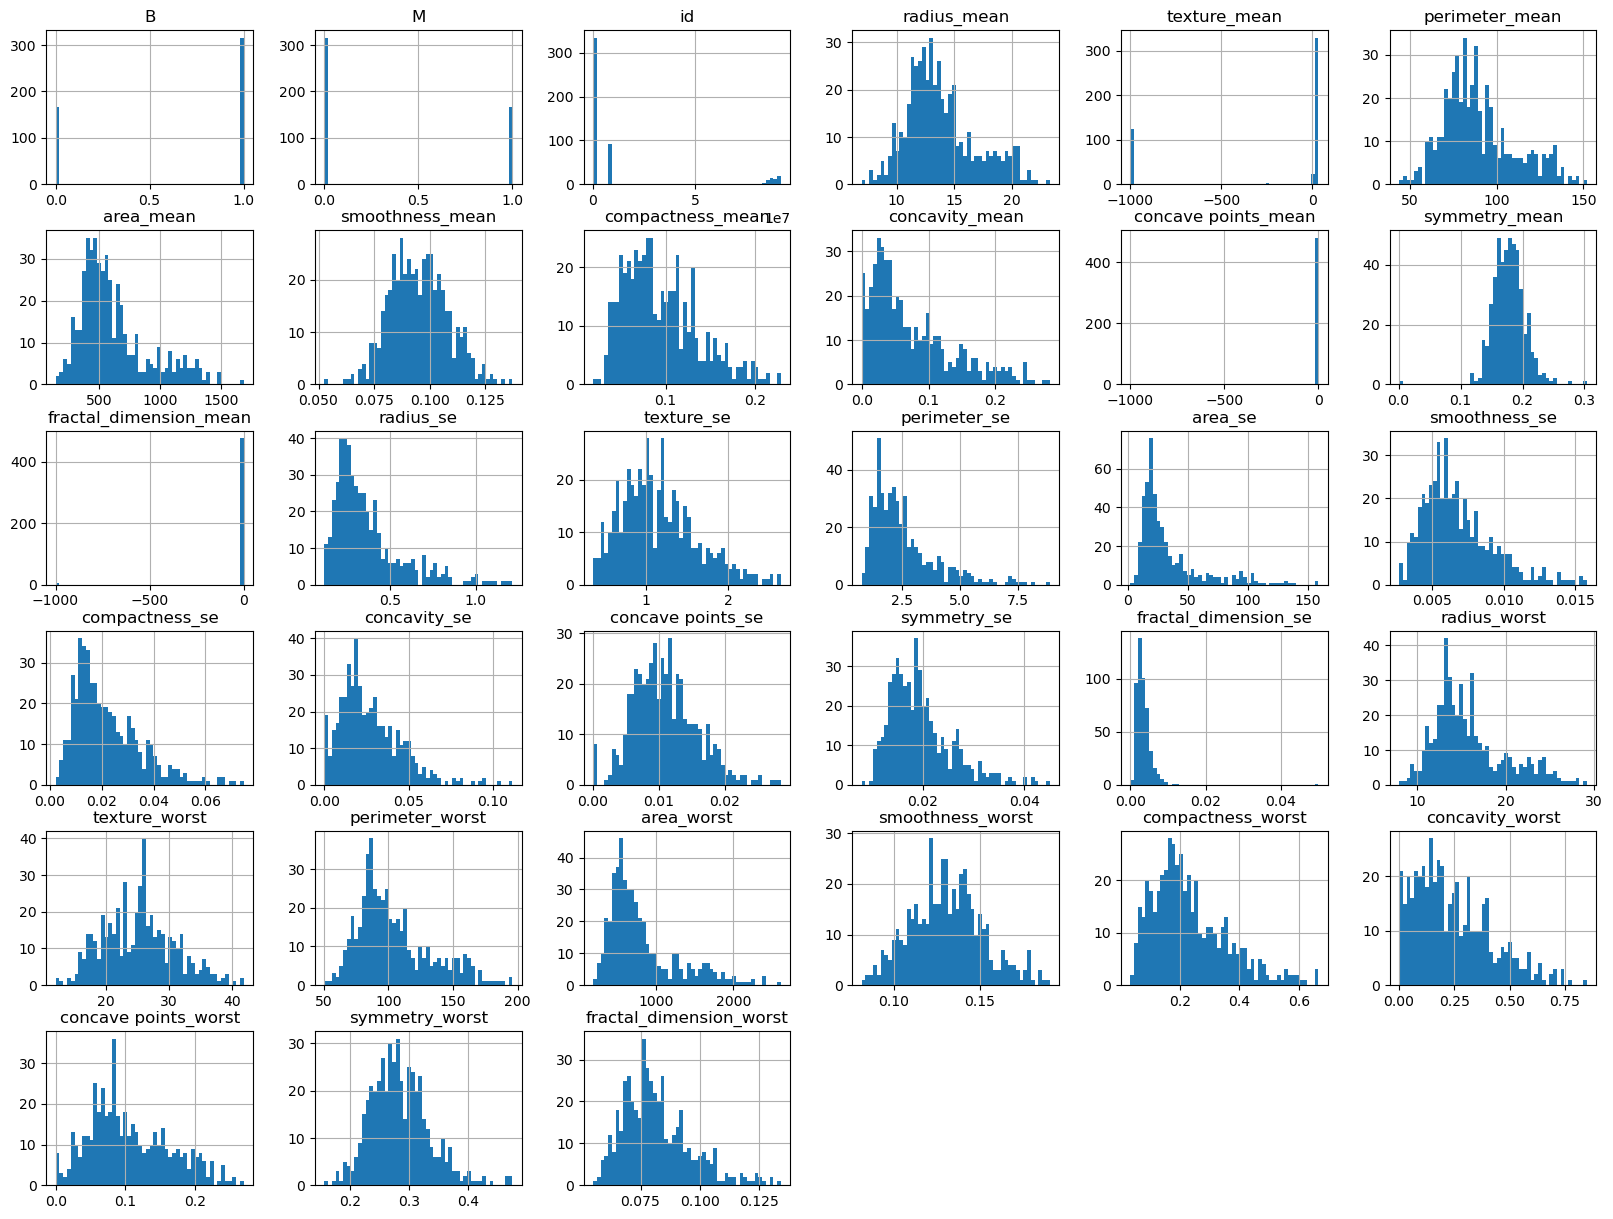

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Below is the distribution of the Target variables showing the variations between the number of M and B in my cleaned data

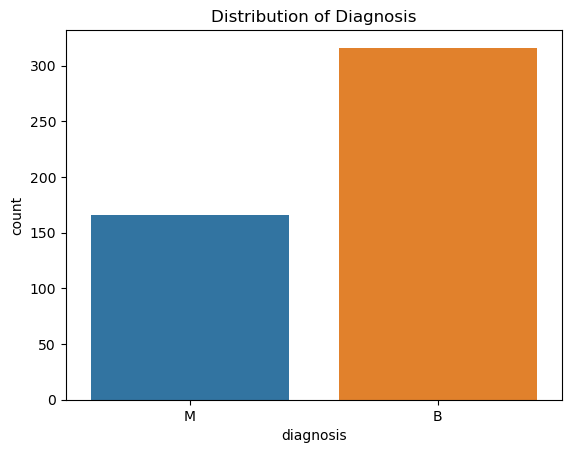

In [18]:
# Displaying Distribution for my target variable 'diagnosis'
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

Displaying the relationship between the Target variables and the predictor variables using correlation matrix. Although a visualization wold have been better and more interesting but due to the largeness of our features hence, i decided to make use of this as an alternative.

In [19]:
corr_matrix = df.corr()
corr_matrix["B"].sort_values(ascending=False)

B                          1.000000
symmetry_se                0.049603
smoothness_se              0.035205
texture_se                 0.033529
concave points_mean        0.021401
fractal_dimension_mean     0.011769
id                        -0.004875
fractal_dimension_se      -0.022533
texture_mean              -0.122182
concavity_se              -0.170607
compactness_se            -0.182172
symmetry_mean             -0.190213
smoothness_mean           -0.218576
concave points_se         -0.237378
texture_worst             -0.247748
fractal_dimension_worst   -0.257715
smoothness_worst          -0.277832
radius_se                 -0.307535
perimeter_se              -0.317496
symmetry_worst            -0.327481
area_se                   -0.346664
area_mean                 -0.350618
radius_mean               -0.355344
perimeter_mean            -0.366000
concavity_worst           -0.375573
compactness_mean          -0.378135
compactness_worst         -0.379985
concavity_mean            -0

From the result above, it shows that factors such as: fractal_dimension_se, texture_se, concave points_mean, smoothness_se, fractal_dimension_mean has a Positive correlation with the target variable "B". while other factors such as: symmetry_se, symmetry_mean, concavity_se, texture_mean, perimeter_worst, compactness_se, concave points_se, smoothness_mean, fractal_dimension_worst, texture_worst, area_se, smoothness_worst, radius_se, perimeter_se, area_worst, symmetry_worst, concavity_worst, area_mean, concavity_mean, radius_mean, compactness_worst, compactness_mean, perimeter_mean, radius_worst, concave points_worst has a negative relationship with the target variable "B". It is also important to note that the arrangement in the output above shows the order of strength of their relationships with the target variable.

In [20]:
corr_matrix = df.corr()
corr_matrix["M"].sort_values(ascending=False)

M                          1.000000
concave points_worst       0.444583
perimeter_worst            0.421528
radius_worst               0.415389
area_worst                 0.403943
concavity_mean             0.388151
compactness_worst          0.379985
compactness_mean           0.378135
concavity_worst            0.375573
perimeter_mean             0.366000
radius_mean                0.355344
area_mean                  0.350618
area_se                    0.346664
symmetry_worst             0.327481
perimeter_se               0.317496
radius_se                  0.307535
smoothness_worst           0.277832
fractal_dimension_worst    0.257715
texture_worst              0.247748
concave points_se          0.237378
smoothness_mean            0.218576
symmetry_mean              0.190213
compactness_se             0.182172
concavity_se               0.170607
texture_mean               0.122182
fractal_dimension_se       0.022533
id                         0.004875
fractal_dimension_mean    -0

From the result above, it shows that factors such as: symmetry_se, symmetry_mean, concavity_se, texture_mean, perimeter_worst, compactness_se, concave points_se, smoothness_mean, fractal_dimension_worst, texture_worst, area_se, smoothness_worst, radius_se, perimeter_se, area_worst, symmetry_worst, concavity_worst, area_mean, concavity_mean, radius_mean, compactness_worst, compactness_mean, perimeter_mean, radius_worst, concave points_worst has a Positive correlation with the target variable "M". while other factors such as: fractal_dimension_se, texture_se, concave points_mean, smoothness_se, fractal_dimension_mean has a negative relationship with the target variable "M". It is also important to note that the arrangement in the output above shows the order of strength of their relationships with the target variable.

### 1.4 Feature Engineering Techniques

One of the most widely used attribute evaluation methods is information gain (InfoGain). It is aunivariate filter technique that provides an orderedranking of all attributes and selects based on athreshold value (Hall & Smith, 1998; . InfoGain is ametric that quantifies how much information(relevant) is gained from a dataset's class prediction based on the presence or absence of informativegenes. Su et al. (2003) described an informationgain measure as a mean utilized to assess therelevance of a gene and the class value.  

Therefore, we will be running feature selection using information gain as our target variable is categorical and also our features have a non linear relationship with the target variable. Hence, that informed our decision for using Information gain instead of other feature selection methods such as Anova F-statistics and so on.

Morealso, the feature selection was done using Information gain to select the best 5 features that is fit for the Target variables

In [21]:
import numpy as np
import pandas as pd

selected_features = ['symmetry_se', 'symmetry_mean', 'concavity_se', 'texture_mean', 'perimeter_worst', 'compactness_se', 'concave points_se', 'smoothness_mean', 'fractal_dimension_worst', 'texture_worst', 'area_se', 'smoothness_worst', 'radius_se', 'perimeter_se', 'area_worst', 'symmetry_worst', 'concavity_worst', 'area_mean', 'concavity_mean', 'radius_mean', 'compactness_worst', 'compactness_mean', 'perimeter_mean', 'radius_worst', 'concave points_worst', 'fractal_dimension_se', 'texture_se', 'concave points_mean', 'smoothness_se', 'fractal_dimension_mean']

X = df[selected_features]
y = df['diagnosis']

def calculate_entropy(y):
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  #Take note that in this codd I add a small value to avoid log(0)
    return entropy

In [22]:
def calculate_information_gain(X, y, feature):
    unique_values = X[feature].unique()
    entropy_feature = 0

    for value in unique_values:
        subset_indices = X.index[X[feature] == value]
        subset_entropy = calculate_entropy(y.loc[subset_indices])
        entropy_feature += len(subset_indices) / len(y) * subset_entropy

    information_gain = calculate_entropy(y) - entropy_feature
    return information_gain

In [23]:
def select_features_by_information_gain(X, y, k):
    information_gains = []

    for feature in X.columns:
        information_gain = calculate_information_gain(X, y, feature)
        information_gains.append((feature, information_gain))

    # Sort features by Information Gain in descending order
    selected_features = [feature for feature, _ in sorted(information_gains, key=lambda x: x[1], reverse=True)[:k]]
    return selected_features

# Example: Select top-k features with highest Information Gain
k = 5
selected_features = select_features_by_information_gain(X, y, k)
print(f'Selected Features: {selected_features}')

Selected Features: ['smoothness_se', 'area_worst', 'concavity_worst', 'perimeter_mean', 'fractal_dimension_se']


### 1.5 Splitting the dataset into a Training Set and a Test Set

Training data involves reserving a portion of the dataset suitable for the model in view. A training set is designed which the model can see and learn from directly to help enhance its parameters. Trained data must be large enough to produce results that are meaningful and also be able to adequately represent a dataset (Rasool et al., 2022). On the other hand, data splitting in machine learning is used to divide data into sets for training, testing and validation. It is used to generalise performance estimation and identify complexities in a dataset. Dataset is divided into various distinct groups based on specific chosen criteria (Dalal et al., 2023).

In [24]:
X = df.drop(['diagnosis', 'B', 'M', 'id'], axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
3,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
4,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
478,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
479,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
480,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [25]:
y = df[['B', 'M']]
y

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
477,1,0
478,1,0
479,1,0
480,0,1


I defined our X and y variables after which I move on to split the dataset

In [26]:
#Spliting the dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

We will be splitting the dataset in ration 80:20 for the training and test data respectively and this is to evaluate the performance of a machine learning model on data it hasn't seen during training. And our choice of splitting involves a trade-off between having enough data for training and having enough data for testing. And a random state is set to ensure consistent randomization of selected data.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
410,14.64,-999.00,94.21,666.0,0.08641,0.06698,0.05192,0.027910,0.1409,0.05355,...,16.46,25.44,106.00,831.0,0.114200,0.2070,0.2437,0.07828,0.2455,0.06596
25,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,-3.512987,0.2183,0.06197,...,23.15,34.01,160.50,1670.0,0.149100,0.4257,0.6133,0.18480,0.3444,0.09782
220,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.021420,0.1635,0.05859,...,14.80,30.04,97.66,661.5,0.100500,0.1730,0.1453,0.06189,0.2446,0.07024
395,11.62,-999.00,76.38,408.8,0.11750,0.14830,0.10200,0.055640,0.1957,0.07255,...,13.36,25.40,88.14,528.1,0.178000,0.2878,0.3186,0.14160,0.2660,0.09270
231,13.85,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.037110,0.2110,0.05853,...,14.98,21.74,98.37,670.0,0.118500,0.1724,0.1456,0.09993,0.2955,0.06912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,13.61,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.030850,0.1761,0.06130,...,16.89,35.64,113.20,848.7,0.147100,0.2884,0.3796,0.13290,0.3470,0.07900
270,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.034000,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.154700,0.2231,0.1791,0.11550,0.2382,0.08553
348,14.99,-999.00,97.53,693.7,0.08515,0.10250,0.06859,0.038760,0.1944,0.05913,...,16.76,31.55,110.20,867.1,0.132547,0.3345,0.3114,0.13080,0.3163,0.09251
435,11.34,-999.00,72.76,391.2,0.10490,0.08499,0.04302,0.025940,0.1927,0.06211,...,12.47,23.03,79.15,478.6,0.148300,0.1574,0.1624,0.08542,0.3060,0.06783


In [29]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
416,18.010,-999.00,118.40,1007.0,0.10010,0.12890,0.11700,0.077620,0.2116,0.06077,...,21.530,26.06,143.40,1426.0,0.13090,0.23270,0.25440,0.14890,0.3251,0.07625
472,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.012820,0.1692,0.06576,...,9.845,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393
181,11.890,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.031420,0.1967,0.06314,...,13.250,27.10,86.20,531.2,0.14050,0.30460,0.28060,0.11380,0.3397,0.08365
444,8.571,13.10,54.53,221.3,0.10360,0.07632,0.02565,0.015100,0.1678,0.07126,...,9.473,18.45,63.30,275.6,0.16410,0.22350,0.17540,0.08512,0.2983,0.10490
297,11.140,-999.00,71.24,384.6,0.07274,0.06064,0.04505,0.014710,0.1690,0.06083,...,12.120,15.82,79.62,453.5,0.08864,0.12560,0.12010,0.03922,0.2576,0.07018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,17.190,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.065270,0.1867,0.05580,...,21.580,29.33,140.50,1436.0,0.15580,0.25670,0.38890,0.19840,0.3216,0.07570
392,13.140,-999.00,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,0.06020,...,14.800,25.46,100.90,689.1,0.13510,0.35490,0.45040,0.11810,0.2563,0.08174
321,13.280,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.028640,0.1617,0.05594,...,14.240,17.37,96.59,623.7,0.11660,0.26850,0.28660,0.09173,0.2736,0.07320
334,11.060,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,...,12.680,20.35,80.79,496.7,0.11200,0.18790,0.20790,0.05556,0.2590,0.09158


In [30]:
y_train

,B,M
410,1,0
25,0,1
220,0,1
395,1,0
231,1,0
...,...,...
106,0,1
270,1,0
348,1,0
435,1,0


In [31]:
y_test

,B,M
416,0,1
472,1,0
181,1,0
444,0,1
297,0,1
...,...,...
218,0,1
392,1,0
321,1,0
334,1,0


### 1.6 Transforming data

Data transformation is vital to data processing. It involves conversion, cleaning and structuring data into such a format that is usable and analysable to enable it fit into a certain context or purpose and aid decision making (Ghosh, 2022). It helps data become more understandable. MinMaxScaler is a data transformation tool that preserves the information of the original data. It scales data linearly between a minimum and maximum value (0-1) which usually corresponds with the lowest and highest points of the dataset (Abdennour, Ouni, and Amor, 2021).

Therefore, I applied standardization to continuous features using MinMaxScaler

In [32]:
# Standardize or normalize the continuous features
#Carrying out Normalization, aka MinMaxScaling, on our X_train, X_test
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_train

array([[0.47019461, 0.        , 0.46551565, ..., 0.28981859, 0.27917189,
        0.13812294],
       [0.71514519, 0.99157638, 0.74794571, ..., 0.68419104, 0.58939774,
        0.54110802],
       [0.40573393, 0.98841026, 0.40042471, ..., 0.22913736, 0.27634881,
        0.19225904],
       ...,
       [0.4916815 , 0.        , 0.49616841, ..., 0.48426509, 0.50125471,
        0.47394384],
       [0.2676039 , 0.        , 0.26747299, ..., 0.31625324, 0.46894605,
        0.16177587],
       [0.71698692, 0.9838402 , 0.71655433, ..., 0.61977046, 0.41687578,
        0.3733873 ]])

In [33]:
X_test = min_max_scaler.fit_transform(X_test)
X_test

array([[0.74978156, 0.        , 0.76702294, ..., 0.55714099, 0.62601279,
        0.23038157],
       [0.06052903, 0.99271705, 0.05380089, ..., 0.02092487, 0.27803838,
        0.19697624],
       [0.26364286, 0.9892263 , 0.273688  , ..., 0.40444599, 0.68827292,
        0.33693305],
       ...,
       [0.37405672, 0.98472429, 0.37540531, ..., 0.3084352 , 0.40639659,
        0.18646508],
       [0.19771229, 0.9858036 , 0.18950402, ..., 0.1510854 , 0.34413646,
        0.45111591],
       [0.46620065, 0.98614393, 0.47363997, ..., 0.60499413, 0.38720682,
        0.2387329 ]])

To ensure this worked, we can obtained the Minimum and Maximum Value for the first column of the X_train and X_test (radius_mean)

In [34]:
X_train[:, 0].min()

0.0

In [35]:
X_train[:, 0].max()

0.9999999999999998

Our Training set is between 0 & 1, This is what is expected as we fitted the scaler based on the training data. Now lets check our test set

In [36]:
X_test[:,0].min()

0.0

In [37]:
X_test[:,0].max()

1.0

### Task 1 Conclusion

In conclusion, the dataset, was loaded and numeric columns (excluding 'id' and 'diagnosis') were inspected for missing values which we identified some missing values and the replaced by the mean of respective variables after which duplicates and empty rows were removed to ensure data cleanliness and also, comprehensive data preprocessing ensured data quality and prepared features for model training. Some visualizations were carrieed out to provide insights into data distribution and relationships between variables. However, feature selection was performed using Information gain. Feature selection helped identify the most relevant features for model training.

Finally, 'diagnosis' which is the target variable was one-hot encoded for model training and visualizations were created to understand the data distribution, including histograms and the distribution of the 'diagnosis' variable and then correlation matrices were calculated to assess relationships between variables. The dataset was split into training and testing sets, continuous features were normalized using Min-Max Scaling.

## 2.0 Utilising features and attributes derived from the pre-processing and EDA stage, conduct an unsupervised machine learning analysis with the aim of gaining further insights into the data via either clustering or dimensionality reduction.

Unsupervised machine learning is a type of machine learning in which data is learnt from without human supervision. They can be fed with data that is unlabeled and has the ability to discover patterns and trends in the dataset through clustering and association, without any explicit instruction. Supervision, labelled outcomes and pairing input with desired output is not necessary (Wang and Biljecki, 2022).

Clustering involves techniques utilised in partitioning data into groups of data which have more similarities to other items in their cluster  than items in another cluster (Gao et al., 2023). 

Hence to carry out Clustering for the purpose of this, it is important to check the optimal number of clusters that will work absolutely using the shilhouette score and inertia although this can be confirmed by any of the method but in the case of this analysis, we have decided to use the two so as confirm the result. The K means clustering is being done on our training set after which I will apply the same clustering to the test data. The reason for this is that the clustering algorithm learns patterns and centroids from the training data, and I want to evaluate its performance on new, unseen data.

## 2.1 Clustering using different appropriate algorithms

### 2.1.1 Clustering Using Kmeans

K-means clustering divides objects of data into groups that do not overlap. No data object can belong to more than one cluster and each cluster must at least possess a specific object. It produces a high intra cluster similarity by taking the input of a dataset and parameter and dividing the dataset of particular objects into parameter groups (Liu et al., 2021).

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the Silhouette Score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

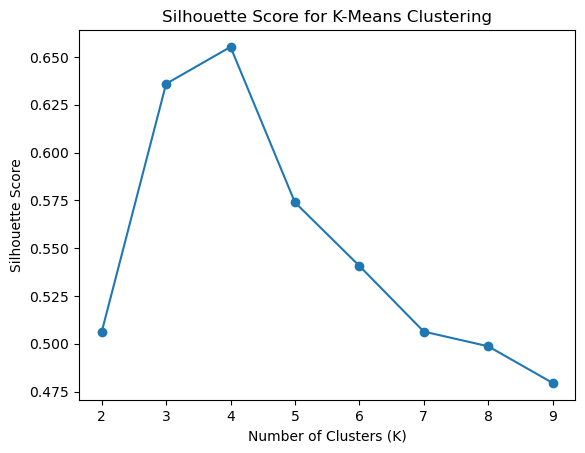

In [39]:
# Plot the Silhouette Score
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.show()

In [40]:
# Determine the optimal number of clusters using the Silhouette Score
inertia = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

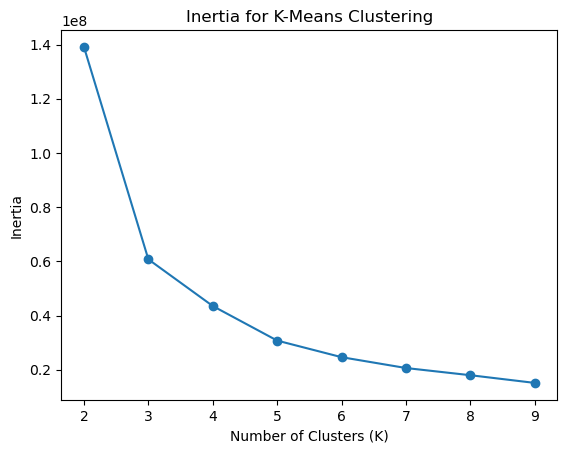

In [41]:
# Plot the Silhouette Score
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia for K-Means Clustering')
plt.show()

From the above it is imperative to know that the elbow is seen on 3 which indicate that our K = 3 hence the optimal number of clusters we will be using is 3 clusters.

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)

kmeans.fit(X)

KMeans(n_clusters=3)

In [43]:
y_pred = kmeans.predict(X)

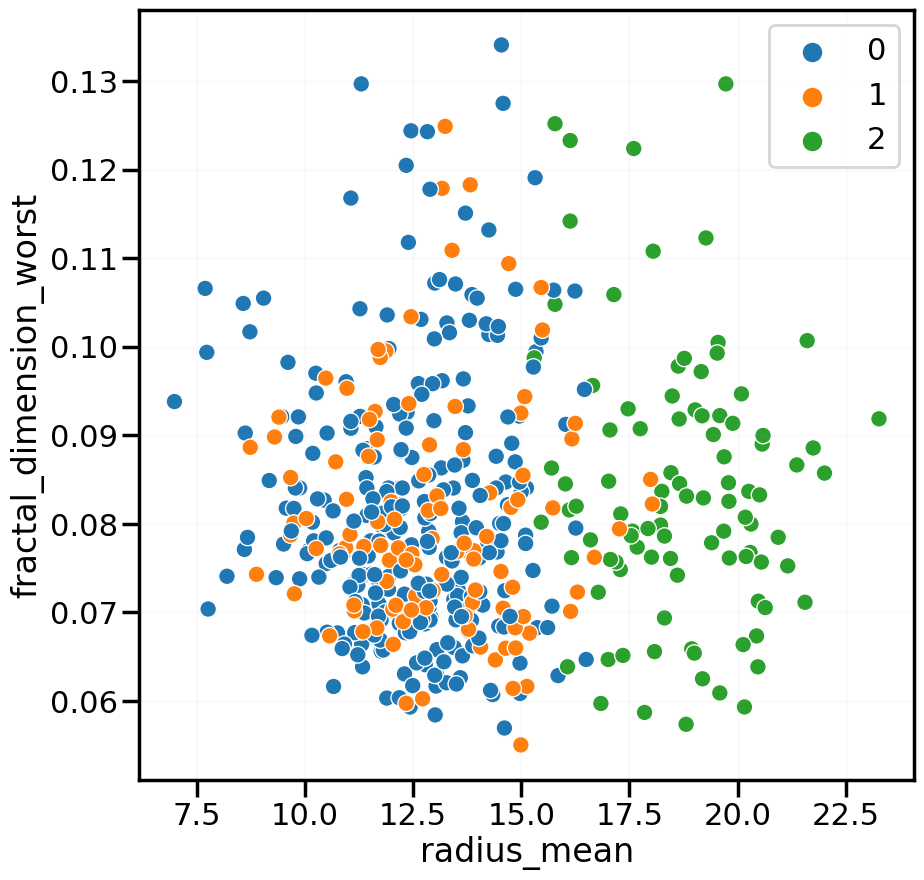

In [44]:
plt.figure(figsize=(10, 10))
sns.set_context('poster')

# using the first and the last variables
sns.scatterplot(x=X['radius_mean'],
                y=X['fractal_dimension_worst'],
                hue=y_pred,
                palette='tab10')

plt.grid(alpha=0.05)
plt.show()

From the above, we can see that after carry out our visualization of the clusters to see the clustering of our factors, it is quite evident that K means clustering has a level of limitations as the clustering is quite interelated and couldn't be separated distinctively from the visualization. Hence we can say, K means using 3 clusters perform quite poorly in this Dataset.

Alternatively, from the preconceived knowledge of the data through visualization. we were able to know that our data has two major classification in the Target variable "Diagnosis (M = malignant, B = benign)". Hence we decided to also carry out Kmeans Clustering using 2 clusters to see how my data is classified based on the target variables below

In [45]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 2)

k_means.fit(X)

KMeans(n_clusters=2)

In [46]:
y_pred2 = k_means.predict(X)

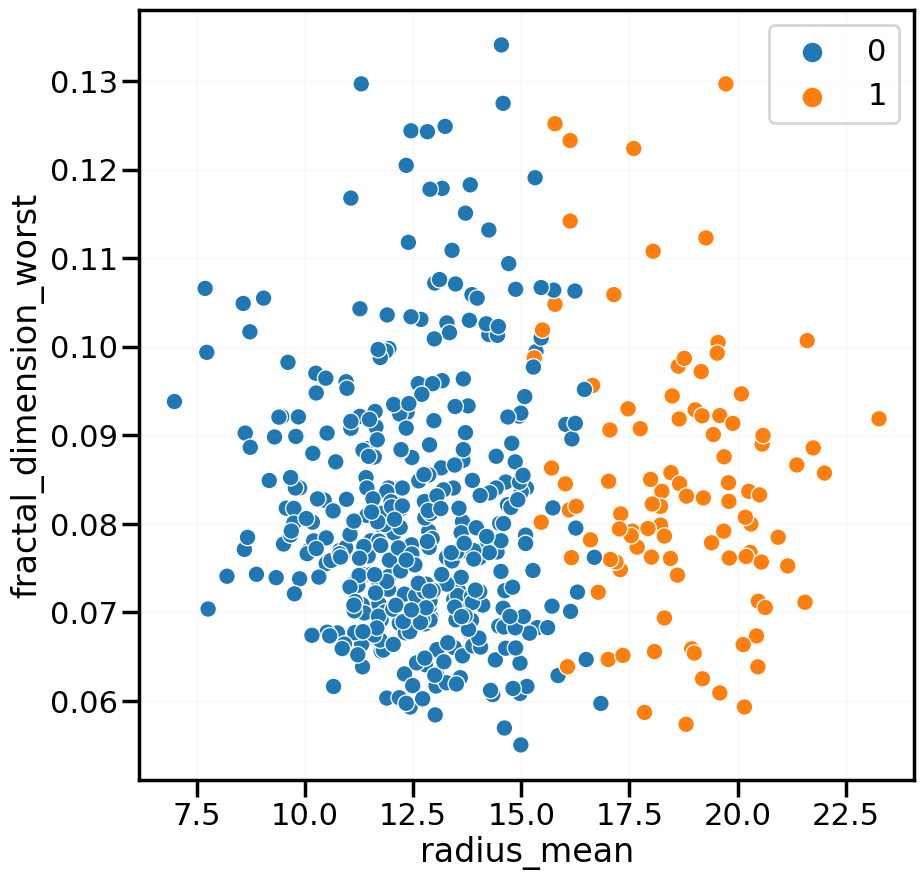

In [47]:
plt.figure(figsize=(10, 10))
sns.set_context('poster')

# using the first and the last variables
sns.scatterplot(x=X['radius_mean'],
                y=X['fractal_dimension_worst'],
                hue=y_pred2,
                palette='tab10')

plt.grid(alpha=0.05)
plt.show()

Howbeit, from the above, we can see that after carry out our visualization of the clusters to see the clustering of our factors, it is quite evident that K means clustering using 2 clusters was able to adequately create a level of separation the the dataset. Therefore we can say Kmeans clustering performed well on the data using 2 clusters.

### 2.1.2 Clustering using Hierarchical Clustering

Hierarchical clustering assigns clusters by building hierarchy, either using a top-down or bottom-up approach. 

In [48]:
from sklearn.cluster import AgglomerativeClustering

# Performing Hierarchical Clustering
agglomerative = AgglomerativeClustering(linkage = 'ward')
df['cluster_hierarchical'] = agglomerative.fit_predict(X)

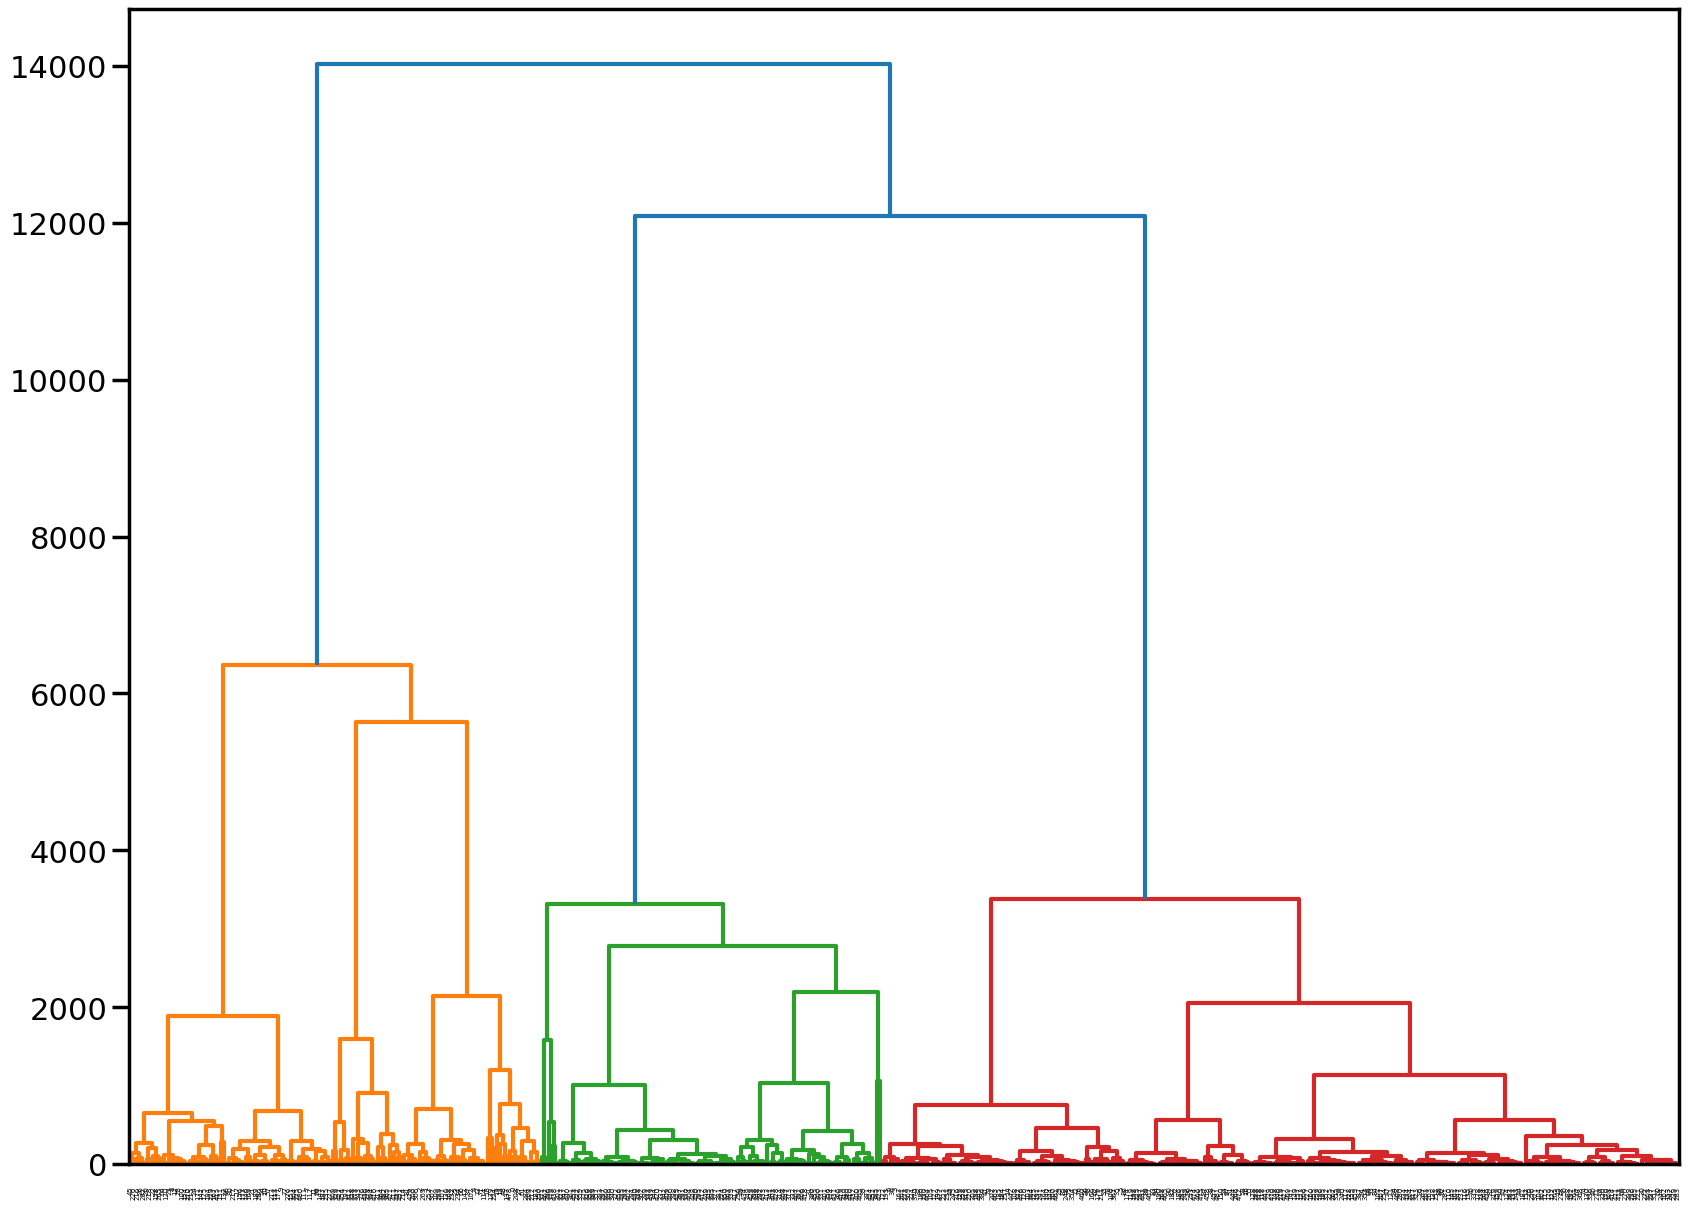

In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, 'ward')

plt.figure(figsize=(20,15))

dendrogram(Z)

plt.show()

From the above fig, the dendrogram shows and helps in understanding the hierarchical structure of the clusters and the order in which data points are merged during the clustering process. More also, cutting the dendrogram through the longest vertical line in the tree and also the distinctiveness of colours, we can say that the numbers of clusters present in our dataset is three which is also more or less similar to the result obtained from K means clustering using 3 clusters.

### 2.1.3 DBSCAN Clustering

DBSCAN clustering is density-based and seperates data points into regions of high density adequately separated by regions of low density. It is more automatic in determining number of clusters depending on the density of data points produced (Rodriguez et al., 2019). 

Carrying out DBScan Clustering requires an accurate eps and mean sample so as to ensure accuracy of clustering and to to that, we used NearestNeighbors from sklearn and also kneelocator to find the accurate number of corresponding Eps value for our clustering. Aterwhich we perform DBScan.

In [50]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# Fitting a nearest neighbors model to find distances to the third nearest neighbor
nearest_neighbors = NearestNeighbors(n_neighbors=3)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

# Sorting the distances and find the knee point
distances = np.sort(distances[:, 2], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

# Getting the knee point index and corresponding distance
knee_index = knee.knee
eps_value = distances[knee_index]

# Print the identified knee point and corresponding eps value
print("Knee Point Index:", knee_index)
print("Corresponding Eps Value:", eps_value)

Knee Point Index: 430
Corresponding Eps Value: 89.09182925334001


In [51]:
import seaborn as sns
from sklearn.cluster import DBSCAN

# Performing DBSCAN Clustering
dbscan = DBSCAN(eps=114.52, min_samples=20)
y_pred_dbscan = dbscan.fit_predict(X)

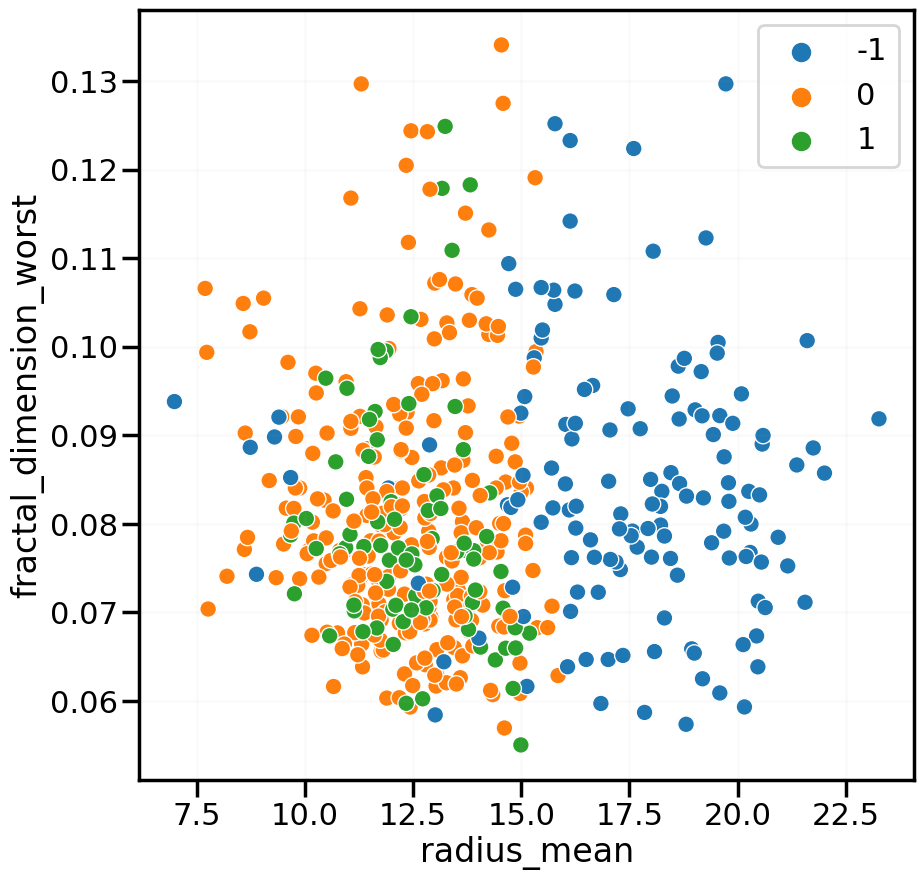

In [52]:
plt.figure(figsize=(10, 10))
sns.set_context('poster')

# Using the first and the last variables
sns.scatterplot(x=X['radius_mean'],
                y=X['fractal_dimension_worst'],
                hue=y_pred_dbscan,  # Use y_pred_dbscan instead of y_pred_dbscan.labels_
                palette='tab10')

plt.grid(alpha=0.05)
plt.show()

From the above Fig., After applying the appropriate eps(Epsilon) of 89.09 as calculated using Skilearn and also a mean sample of 20 which means that a cluster can only be formed if it contains a minimum of 20 samples. The DBSCAN clustering result shows -1,0,1 for all data points, and this indicates that DBSCAN is contains 3 clusters which is also related to the result obtained from Hierarchical Clustering.

## 2.2 Dimensionality Reduction:

### 2.2.1 Principal Component Analysis (PCA)

Principal component analysis is a dimensionality reduction method used to transform large data sets into smaller sets that preserve information possessed by the large dataset (Bian et al., 202). It helps in simplifying data to make it easier and faster to explore and visualise in machine learning. It shares many similarities with exploratory data analysis. It is versatile in bringing out essential components in a data, called principal components, which are linear representations of the original variable that can fully represent the variance of all the variables (Greenacre et al., 2022).

In [53]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA()
X_transformed = pca.fit_transform(X)

In [54]:
pca.explained_variance_ratio_

array([5.67296397e-01, 3.96164783e-01, 2.02645083e-02, 8.22016136e-03,
       7.54167708e-03, 3.91088465e-04, 6.50372510e-05, 4.96379208e-05,
       5.06930938e-06, 1.05979316e-06, 3.34685398e-07, 1.59869599e-07,
       6.18244685e-08, 1.07239532e-08, 4.47222665e-09, 3.20501217e-09,
       2.38972594e-09, 1.04919820e-09, 4.60265425e-10, 4.16165364e-10,
       3.08107559e-10, 1.76247203e-10, 1.12632737e-10, 9.04387796e-11,
       3.91755236e-11, 2.66891067e-11, 1.56618421e-11, 9.62788692e-12,
       4.70762841e-12, 2.20717868e-12])

Since we are aware that our data was 30-dimentional which means we will have 30 orthogonal Principal components which is confirmed by the arrays above.

However we need to proceed to see the level of variation as explained in the PCA below

In [55]:
for i, j in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {round(pca.explained_variance_ratio_[i]*100, 2)}%")

PC1: 56.73%
PC2: 39.62%
PC3: 2.03%
PC4: 0.82%
PC5: 0.75%
PC6: 0.04%
PC7: 0.01%
PC8: 0.0%
PC9: 0.0%
PC10: 0.0%
PC11: 0.0%
PC12: 0.0%
PC13: 0.0%
PC14: 0.0%
PC15: 0.0%
PC16: 0.0%
PC17: 0.0%
PC18: 0.0%
PC19: 0.0%
PC20: 0.0%
PC21: 0.0%
PC22: 0.0%
PC23: 0.0%
PC24: 0.0%
PC25: 0.0%
PC26: 0.0%
PC27: 0.0%
PC28: 0.0%
PC29: 0.0%
PC30: 0.0%


Hence, from the result above we can deduce that PC1 accounts for 56.73% of the variance, and PC2 accounts for 39.62% of the variance while the remaining components (PC3 - PC30) accounts for less than 5% of the total variance.

Text(0.5, 1.0, 'Principal Component vs Explained Variance')

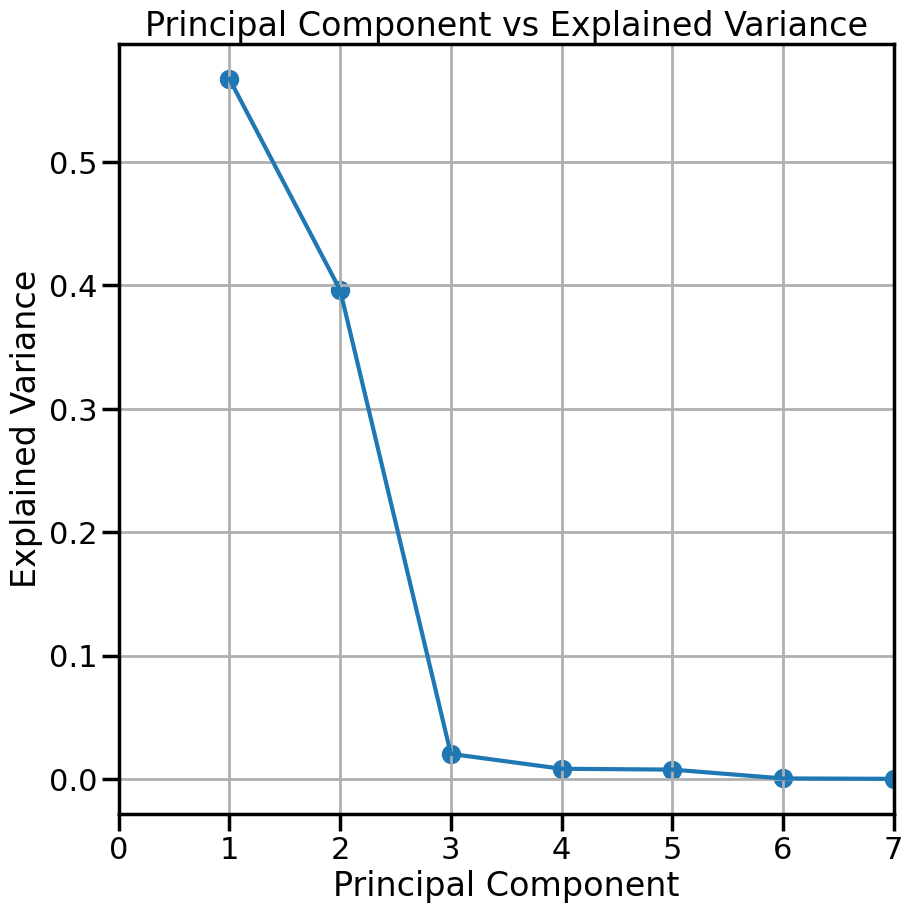

In [56]:
# Plotting the variance explained by each of the principal components
plt.figure(figsize=(10, 10))
plt.plot(range(1, 31),pca.explained_variance_ratio_)
plt.scatter(range(1, 31),pca.explained_variance_ratio_)
plt.grid()
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xlim(0, 7)
plt.title('Principal Component vs Explained Variance')

The Fig above shows the diagramatic representation of the Principal Component and the Variance among the first 7 components

Further more, we will be plotting below the cumulative sum of the variances to see how many PCs we need to exceed 95% of the variance (the blue dotted line)

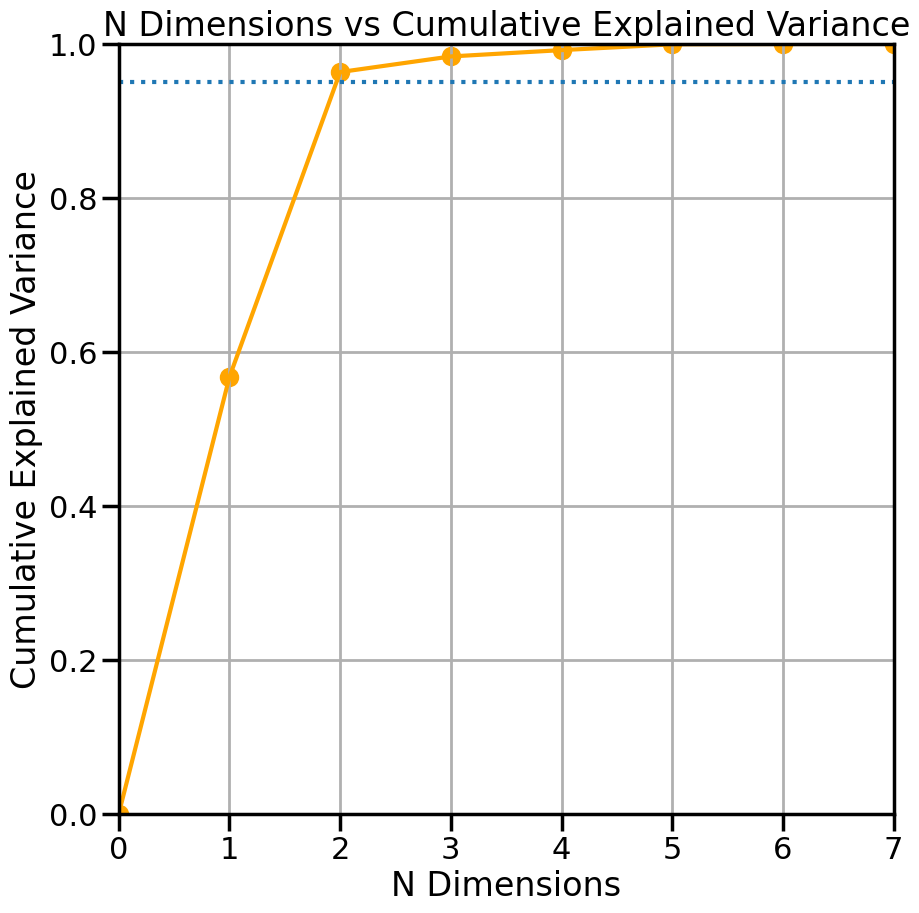

In [57]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum = np.insert(cumsum, 0, 0)

plt.figure(figsize=(10, 10))
plt.plot(range(0, 31), cumsum, c = 'orange')
plt.scatter(range(0, 31), cumsum, c = 'orange')
plt.grid()
plt.xlabel('N Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.xlim(0, 7)
plt.ylim(0, 1)
plt.title('N Dimensions vs Cumulative Explained Variance')
plt.axhline(0.95, linestyle = 'dotted')

The Fig above shows the relationship between Number of Dimensions in respect to the Cumulative Explained Variance. Hence at 95%, we will be retaining 2 dimensions of all the dimensions that is available in the data.

In [58]:
X_transformed

array([[ 1.34673129e+03, -2.35758987e+02,  4.83540303e+00, ...,
        -2.21492345e-03,  1.14216138e-04,  7.27081922e-05],
       [ 1.07336621e+03, -2.44607670e+02,  2.83185060e+00, ...,
        -2.59219568e-04, -1.04861583e-03,  6.77272641e-04],
       [ 1.00902508e+03, -2.36028181e+02,  2.59439799e+00, ...,
         1.29726378e-03, -2.26491085e-03, -2.33949198e-03],
       ...,
       [ 1.12299397e+03, -2.49790444e+02,  3.45289995e+00, ...,
        -6.73028140e-04,  4.53252124e-03, -1.02232563e-03],
       [ 3.92645167e+02, -2.65688255e+02, -2.11388746e+00, ...,
        -2.76031078e-04, -6.95466100e-05, -7.87942815e-04],
       [-6.94643807e+02, -2.88010029e+02, -1.08047329e+01, ...,
         1.46908057e-03,  7.20161927e-04, -2.06878841e-04]])

Take note that our output transformed matrix 'X_transformed' now contains the dataset in the new coordinate system.

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_transformed = pca.fit_transform(X)

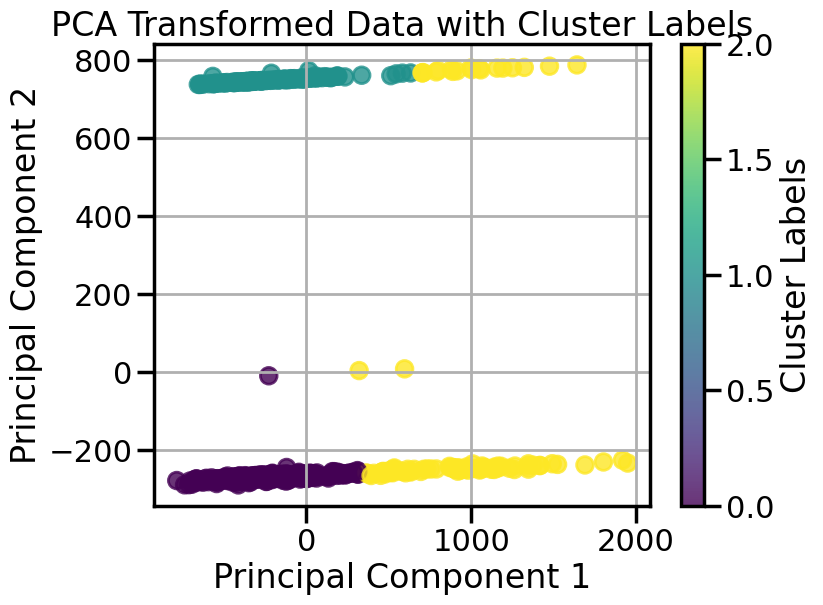

In [60]:
# predicting the method of a fitted KMeans model to obtain the 3 cluster labels for each data point in the original dataset(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred, cmap='viridis', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data with Cluster Labels')
plt.colorbar(label='Cluster Labels')
plt.grid(True)
plt.show()

From the fig. above we visualize the data after applying Principal Component Analysis (PCA) and clustering using KMeans. we used scatter plot in the two-dimensional PCA space to see how the data points are distributed based on the first two principal components, and the color of each point indicates the cluster assignment obtained from 3 clusters KMeans. The essence of this visualization is to help in understanding the structure and separation of clusters in the reduced-dimensional space.

In addition, we decided to also visualize the data after applying PCA and clustering of KMeans when dealing with 2 clusters. 

Below is the visualization.

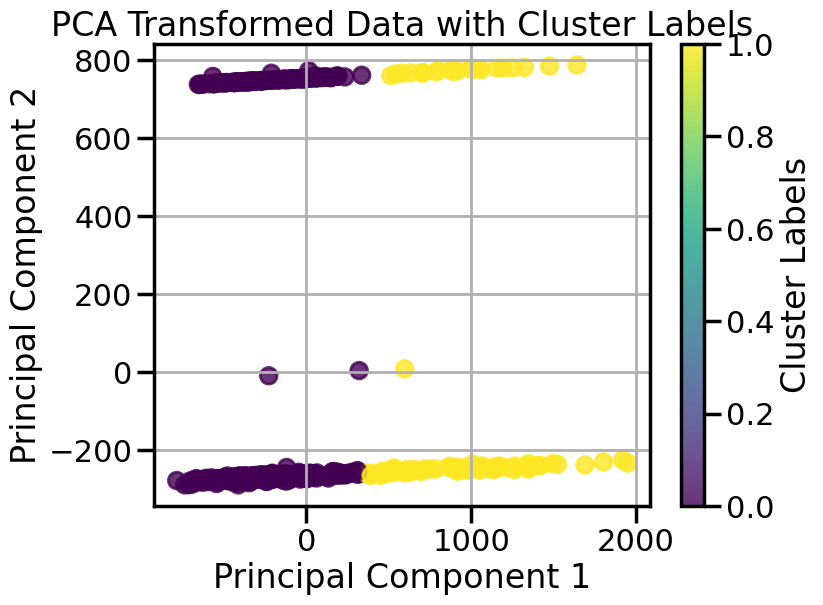

In [61]:
# predicting the method of a fitted KMeans model to obtain the 3 cluster labels for each data point in the original dataset(X)
y_pred2 = k_means.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred2, cmap='viridis', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data with Cluster Labels')
plt.colorbar(label='Cluster Labels')
plt.grid(True)
plt.show()

## 2.3 Evaluating the utility of the different algorithms

In [62]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Assuming the true labels are available in 'diagnosis'
true_labels = df['diagnosis']

# Evaluate K-Means with 3 clusters
ari_kmeans_3 = adjusted_rand_score(true_labels, y_pred)
silhouette_kmeans_3 = silhouette_score(X, y_pred)

# Evaluate K-Means with 2 clusters
ari_kmeans_2 = adjusted_rand_score(true_labels, y_pred2)
silhouette_kmeans_2 = silhouette_score(X, y_pred2)

# Assuming the true labels are available in 'diagnosis' and cluster labels for hierarchical clustering are in 'cluster_hierarchical'
ari_hierarchical = adjusted_rand_score(true_labels, df['cluster_hierarchical'])
silhouette_hierarchical = silhouette_score(X, df['cluster_hierarchical'])

# Assuming the true labels are available in 'diagnosis' and cluster labels for DBSCAN are in 'y_pred_dbscan'

# Convert y_pred_dbscan to a 1D array if it's a DataFrame
if isinstance(y_pred_dbscan, pd.DataFrame):
    y_pred_dbscan = y_pred_dbscan['cluster_label_column'].values

# Evaluate DBSCAN
ari_dbscan = adjusted_rand_score(true_labels, y_pred_dbscan)
silhouette_dbscan = silhouette_score(X, y_pred_dbscan)

In [63]:
print("K-Means Results for 3 clusters:")
print("Adjusted Rand Index:", ari_kmeans_3)
print("Silhouette Score:", silhouette_kmeans_3)
print("\n")

print("K-Means Results for 2 clusters:")
print("Adjusted Rand Index:", ari_kmeans_2)
print("Silhouette Score:", silhouette_kmeans_2)
print("\n")

print("Hierarchical Clustering Results:")
print("Adjusted Rand Index:", ari_hierarchical)
print("Silhouette Score:", silhouette_hierarchical)
print("\n")

print("DBSCAN Results:")
print("Adjusted Rand Index:", ari_dbscan)
print("Silhouette Score:", silhouette_dbscan)
print("\n")

K-Means Results for 3 clusters:
Adjusted Rand Index: 0.10010719091165897
Silhouette Score: 0.6359737224333983


K-Means Results for 2 clusters:
Adjusted Rand Index: 0.19572894243897093
Silhouette Score: 0.506222180028647


Hierarchical Clustering Results:
Adjusted Rand Index: 0.2698990457612256
Silhouette Score: 0.4559094918766008


DBSCAN Results:
Adjusted Rand Index: 0.08272211667360452
Silhouette Score: 0.554642883837715




As can be seen from the above result, there is some degree of agreement between the true labels and the cluster assignments for ARI, with all values being positive. Higher values are typically preferred, though. K-Means with three clusters obtains the highest score on the Silhouette Score, indicating well-defined clusters. K-Means with two clusters has a moderately defined clusters as well. However, it is observed from our visualization that DBSCAN and Hierarchical Clustering would significantly have lower Silhouette Score, which was also confirmed from the evaluation which suggesting some cluster overlap or fewer separate clusters.

### Task 2 Overall Conclusions

Several clustering techniques, such as K-Means, Hierarchical Clustering, and DBSCAN, were investigated in this task. Using silhouette scores and inertia analysis, the ideal number of clusters for K-Means was found, yielding models with 3 and 2 clusters. A dendrogram was used to display the results of Hierarchical Clustering, which was carried out using the Agglomerative Clustering algorithm with ward linkage. Furthermore, a scatterplot was used to display the clusters after DBSCAN clustering was done using an epsilon value determined by the knee point in the nearest neighbors analysis.

In order to reduce dimensionality, principle Component Analysis (PCA) was also used, and the explained variance ratio for each principle component was revealed. A visual representation of the cumulative explained variance was created to help decide how many dimensions to keep.

Following PCA, the data was processed and displayed visually, with points colored based on the cluster labels that were derived from the K-Means models. Lastly, to evaluate the quality of the clusters produced by each technique, cluster evaluation measures were used, including the silhouette score and adjusted Rand index.

All things considered, this thorough analysis sheds light on the dataset's structure and enables decision-making regarding the number of clusters and the clustering algorithm to be used, taking into account a range of assessment factors.

## 3.0 Supervised machine learning

In this 3rd phase of our machine learning tasks, we will be utilising features and attributes from our pre-processing, EDA and unsupervised work to conduct a supervised machine learning analysis aimed at either classifying cases of breast cancer as benign (diagnosis=B) or malignant (Diagnosis=M) and predicting one of the numerical features using regression techniques.

To achieve this, we will carry out the following: 
• We will utilise different classification algorithms to correctly identify observations as benign (Diagnosis=B) or malignant (Diagnosis=M);
• Create some regression models to predict the numerical features;
• And finally evaluate our supervised models with different metrics.

I will like to remind us that alot of data preprocessing has been done in our first phase of analysis including spliting our data and also feature selection. We used feature selection to select about 5 best features that are so relevant to our data using Information gain. 

We need to also note that we have normalized our data using MinMax scaler also in the first phase of the analysis.

We will be moving on to using different classification algorithms to correctly identify observations as benign or malignant. For the purpose of this project we will be using 4 classification algorithms which are Logistic Regression, Decision Tree, Random Forest and Support Vector Machine.

### 3.1 Using Logistic Regression

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

target_column = 'diagnosis'

# Using 5 best features selected using information gain
features = ['radius_worst', 'symmetry_mean', 'smoothness_worst', 'fractal_dimension_mean', 'symmetry_se']

# Spliting our data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_column], test_size=0.2, random_state=47)

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000], 
}

# Initializing the Logistic Regression classifier
classifier = LogisticRegression(random_state=42, multi_class='ovr')

# Now, we initialize Grid Search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Performing Grid Search on the training data
grid_search.fit(X_train, y_train)

# Getting the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# Training the final model on the entire training data
best_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_classifier.predict(X_test)

# Finally, evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Printing the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Accuracy: 0.85
Confusion Matrix:
[[66  3]
 [12 16]]
Classification Report:
              precision    recall  f1-score   support

           B       0.85      0.96      0.90        69
           M       0.84      0.57      0.68        28

    accuracy                           0.85        97
   macro avg       0.84      0.76      0.79        97
weighted avg       0.84      0.85      0.84        97

Best Parameters: {'C': 100, 'max_iter': 100}
Best Accuracy: 0.7324675324675325


The result for classification using logistic regression above shows that the overall accuracy of the model is 0.85, which means the model correctly predicted the target variable (malignant or benign) for 85% of the instances in the test set. More also for the confusion matrix which shows True Negative of 66 which means the model accurately predicts 66 instances of actual benign, predicted as benign while a False Positive of 3 which means the model predicts 3 instances of actual benign, predicted as malignant and False Negative of 12 which means the model predicts 12 instances of actual malignant, predicted as benign and finally True Positive of 16 which means the model predicts 16 instances of actual malignant, accurately predicted as malignant.

Furthermore, for the benign class (B), the model has good precision (0.85) which is the ratio of true positive predictions to the total predicted positives and recall (0.96),which is the ratio of true positive predictions to the total actual positives, resulting in a high F1-score (0.90), which is the harmonic mean of precision and recall, providing a balanced measure. While, for the malignant class (M), the model has lower precision (0.84) and recall (0.57), resulting in a lower F1-score (0.68). After which the weighted average F1-score is 0.84.

We need to take note that we had to create parameter grid for hyperparameter tuning before our logistic classification and this is done so as to search for the best hyperparameters within the range defined and also find the best configuration for our model, leading to better performance and more reliable classification.

### 3.2 Using Decision Tree

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

target_column = 'diagnosis'

# Using 5 best features selected using information gain
features = ['radius_worst', 'symmetry_mean', 'smoothness_worst', 'fractal_dimension_mean', 'symmetry_se']

# Spliting our data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_column], test_size=0.2, random_state=47)

# Defining our parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Grid Search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# We then perform Grid Search on the training data
grid_search.fit(X_train, y_train)

# Getting the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# We train the final model on the entire training data
best_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_classifier.predict(X_test)

# Finally, evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Printing the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Accuracy: 0.79
Confusion Matrix:
[[63  6]
 [14 14]]
Classification Report:
              precision    recall  f1-score   support

           B       0.82      0.91      0.86        69
           M       0.70      0.50      0.58        28

    accuracy                           0.79        97
   macro avg       0.76      0.71      0.72        97
weighted avg       0.78      0.79      0.78        97

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy: 0.6753246753246753


The result for classification using Decision Tree above shows that the overall accuracy of the model is 0.79, which means the model correctly predicted the target variable (malignant or benign) for 79% of the instances in the test set. More also for the confusion matrix which shows True Negative of 63 which means the model accurately predicts 63 instances of actual benign, predicted as benign while a False Positive of 6 which means the model predicts 6 instances of actual benign, predicted as malignant and False Negative of 14 which means the model predicts 14 instances of actual malignant, predicted as benign and finally True Positive of 14 which means the model predicts 14 instances of actual malignant, accurately predicted as malignant.

Furthermore, for the benign class (B), the model has good precision (0.82) which is the ratio of true positive predictions to the total predicted positives and recall (0.91),which is the ratio of true positive predictions to the total actual positives, resulting in a high F1-score (0.86), which is the harmonic mean of precision and recall, providing a balanced measure. While, for the malignant class (M), the model has lower precision (0.70) and recall (0.50), resulting in a lower F1-score (0.58). After which the weighted average F1-score is 0.78.

Just as we did for logistic classification we also created parameter grid for hyperparameter tuning before our Decision Tree classification which is also done so as to search for the best hyperparameters within the range defined and also find the best configuration for our model, leading to better performance and more reliable classification.

### 3.3 Random Forest

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

target_column = 'diagnosis'

# Using 5 best features selected using information gain
features = ['radius_worst', 'symmetry_mean', 'smoothness_worst', 'fractal_dimension_mean', 'symmetry_se']

# Spliting our data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_column], test_size=0.2, random_state=47)

# Defining our parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initializing the Decision Tree classifier
classifier = RandomForestClassifier(random_state=42)

# Initializing Grid Search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# We then perform Grid Search on the training data
grid_search.fit(X_train, y_train)

# Getting the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# We train the final model on the entire training data
best_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = best_classifier.predict(X_test)

# Finally, evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Printing the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Accuracy: 0.81
Confusion Matrix:
[[63  6]
 [12 16]]
Classification Report:
              precision    recall  f1-score   support

           B       0.84      0.91      0.87        69
           M       0.73      0.57      0.64        28

    accuracy                           0.81        97
   macro avg       0.78      0.74      0.76        97
weighted avg       0.81      0.81      0.81        97

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy: 0.7532467532467533


The result for classification using Random Forest above shows that the overall accuracy of the model is 0.81, which means the model correctly predicted the target variable (malignant or benign) for 81% of the instances in the test set. More also for the confusion matrix which shows True Negative of 63 which means the model accurately predicts 63 instances of actual benign, predicted as benign while a False Positive of 6 which means the model predicts 6 instances of actual benign, predicted as malignant and False Negative of 12 which means the model predicts 12 instances of actual malignant, predicted as benign and finally True Positive of 16 which means the model predicts 16 instances of actual malignant, accurately predicted as malignant.

Furthermore, for the benign class (B), the model has good precision (0.84) which is the ratio of true positive predictions to the total predicted positives and recall (0.91),which is the ratio of true positive predictions to the total actual positives, resulting in a high F1-score (0.87), which is the harmonic mean of precision and recall, providing a balanced measure. While, for the malignant class (M), the model has lower precision (0.73) and recall (0.57), resulting in a lower F1-score (0.64). After which the weighted average F1-score is 0.81.

Just as we did for logistic classification and Decision Tree, we also created parameter grid for hyperparameter tuning before our Random forest classification which is also done so as to search for the best hyperparameters within the range defined and also find the best configuration for our model, leading to better performance and more reliable classification.

### 3.4 Support Vector Machine

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the SVM classifier
classifier = SVC(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter based on your needs

# We train the classifier on our training data
classifier.fit(X_train, y_train)

# We proceed to predictions on our test data
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Finally, evaluating the model
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.79
Confusion Matrix:
[[67  2]
 [18 10]]
Classification Report:
              precision    recall  f1-score   support

           B       0.79      0.97      0.87        69
           M       0.83      0.36      0.50        28

    accuracy                           0.79        97
   macro avg       0.81      0.66      0.69        97
weighted avg       0.80      0.79      0.76        97



The result for classification using Support Vector Machine above shows that the overall accuracy of the model is 0.75, which means the model correctly predicted the target variable (malignant or benign) for 75% of the instances in the test set. More also for the confusion matrix which shows True Negative of 60 which means the model accurately predicts 60 instances of actual benign, predicted as benign while a False Positive of 4 which means the model predicts 4 instances of actual benign, predicted as malignant and False Negative of 20 which means the model predicts 20 instances of actual malignant, predicted as benign and finally True Positive of 13 which means the model predicts 13 instances of actual malignant, accurately predicted as malignant.

Furthermore, for the benign class (B), the model has good precision (0.75) which is the ratio of true positive predictions to the total predicted positives and recall (0.94),which is the ratio of true positive predictions to the total actual positives, resulting in a high F1-score (0.83), which is the harmonic mean of precision and recall, providing a balanced measure. While, for the malignant class (M), the model has lower precision (0.76) and recall (0.39), resulting in a lower F1-score (0.52). After which the weighted average F1-score is 0.73.

Although we used, hyper tuning for the other classification done but we did not do that for support vesctor machine and this is because the model performs well without the hypertuning than with it which end up made us decided not to carry out hypertuning for this classification.

In conclusion, we can say that out of all the models Random forest classifier performs the best.

### 3.5 Creating some regression models to predict the numerical features

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming our area mean is the target variable we want to predict
target_feature = 'area_mean'

# Use relevant features that are selected for prediction
regression_features = ['radius_worst', 'symmetry_mean', 'smoothness_worst', 'fractal_dimension_mean', 'symmetry_se']  # Add more features as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[regression_features], df[target_feature], test_size=0.2, random_state=42)

# Initialize the Linear Regression model
regressor = LinearRegression()

# Train the model on the training data
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 5020.15
R-squared: 0.93


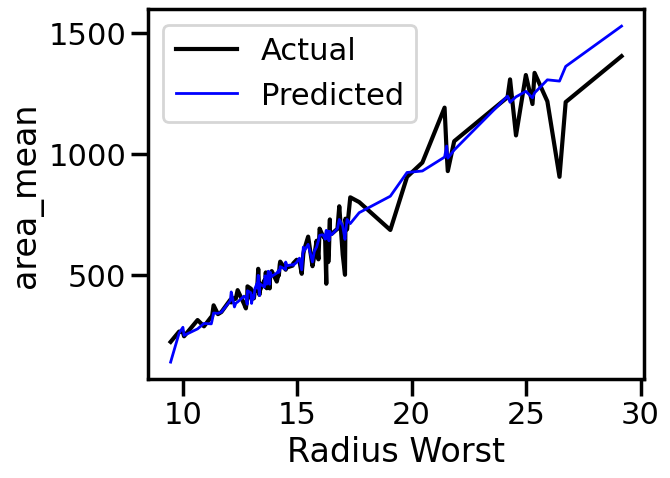

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the test data for better visualization
sorted_indices = np.argsort(X_test['radius_worst'])
X_test_sorted = X_test['radius_worst'].iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the actual values
plt.plot(X_test_sorted, y_test_sorted, color='black', label='Actual')

# Plot the predicted values with a line
plt.plot(X_test_sorted, y_pred_sorted, color='blue', label='Predicted', linewidth=2)

plt.xlabel('Radius Worst')
plt.ylabel(target_feature)
plt.legend()
plt.show()

From the result above, it is important to know that MSE is a measure of the average squared difference between the actual and predicted values and a lower MSE indicates that the model's predictions are closer to the actual values.
Therefore, from the result above, an MSE of 5020.15 suggests that, on average, the squared difference between the predicted and actual values of the 'area_mean' variable is around 5020.15. Meanwhile, R-squared is a measure of how well the model explains the variability in the target variable. More also, R-squared ranges from 0 to 1, where 0 indicates that the model does not explain any variability, and 1 indicates that the model explains all the variability. Hence, our R-squared value of 0.93 is quite high, suggesting that approximately 93% of the variability in 'area_mean' can be explained by our regression model.

### 3.6 ETHICAL IMPLICATIONS

Here are some ethical implication of this analysis:

Privacy Concerns: Ensuring the privacy and confidentiality of this data is essential to prevent unauthorized access or misuse. Machine learning models often require access to large amounts of patient data, including sensitive medical information.

Transparency and Accountability: Machine learning models can be complex and difficult to interpret, raising concerns about transparency and accountability in decision-making. Healthcare providers must be able to understand how these models arrive at their conclusions and be prepared to justify their recommendations (Naik et al., 2022).

Informed Consent: Ensuring informed consent is crucial to respecting patient autonomy and promoting trust in healthcare systems. Patients should be adequately informed about the use of machine learning algorithms in their diagnosis and treatment and should have the opportunity to consent to or opt out of such approaches. 

Clinical Validation: Machine learning models used for medical purposes must undergo rigorous validation to ensure their accuracy, reliability, and safety. Ethical considerations include transparently reporting the performance metrics of these models and regularly updating them to reflect new data and insights (Goisauf and Cano Abadía, 2022).
Safety (Adam et al., 2023)

## References:

Abdennour, N., Ouni, T. and Amor, N. B. (2021) “The importance of signal pre-processing for machine learning: The influence of Data scaling in a driver identity classification,” in 2021 IEEE/ACS 18th International Conference on Computer Systems and Applications (AICCSA). IEEE.

Adam, R. et al. (2023) “Deep learning applications to breast cancer detection by magnetic resonance imaging: a literature review,” Breast cancer research: BCR, 25(1). doi: 10.1186/s13058-023-01687-4.

Ahrou Wassim, Elalaouy Elarbi and Rhoulami Khadija (2022). Application of Machine Learning Approaches in Health Care Sector to The Diagnosis of Breast Cancer. Journal of Physics: Conference Series, 2224(1), pp.012012–012012. doi:https://doi.org/10.1088/1742-6596/2224/1/012012.

Ali, A. et al. (2022) “Practically implementation of information loss: Sensitivity, risk by different feature selection techniques,” IEEE access: practical innovations, open solutions, 10, pp. 27643–27654. doi: 10.1109/access.2022.3152963.

Bian, K. et al. (2020) “RF-PCA: A new solution for rapid identification of breast cancer categorical data based on attribute selection and feature extraction,” Frontiers in genetics, 11. doi: 10.3389/fgene.2020.566057.

Dalal, S. et al. (2023) “A hybrid machine learning model for timely prediction of breast cancer,” Advances in Complex Systems. A Multidisciplinary Journal, 14(04). doi: 10.1142/s1793962323410234.

Gao, C. X. et al. (2023) “An overview of clustering methods with guidelines for application in mental health research,” Psychiatry research, 327(115265), p. 115265. doi: 10.1016/j.psychres.2023.115265.

Ghosh, C. (2022) “Data Pre-processing,” in Data Analysis with Machine Learning for Psychologists. Cham: Springer International Publishing, pp. 55–85.

Goisauf, M. and Cano Abadía, M. (2022) “Ethics of AI in radiology: A review of ethical and societal implications,” Frontiers in big data, 5. doi: 10.3389/fdata.2022.850383.

Greenacre, M. et al. (2022) “Principal component analysis,” Nature reviews. Methods primers, 2(1). doi: 10.1038/s43586-022-00184-w.

Naik, N. et al. (2022) “Legal and ethical consideration in Artificial Intelligence in healthcare: Who takes responsibility?,” Frontiers in surgery, 9. doi: 10.3389/fsurg.2022.862322.

Rabiei, R. (2022). Prediction of Breast Cancer using Machine Learning Approaches. Journal of Biomedical Physics and Engineering, 12(3). doi:https://doi.org/10.31661/jbpe.v0i0.2109-1403.

Rasool, A. et al. (2022) “Improved machine learning-based predictive models for breast cancer diagnosis,” International journal of environmental research and public health, 19(6), p. 3211. doi: 10.3390/ijerph19063211.
Rodriguez, M. Z. et al. (2019) “Clustering algorithms: A comparative approach,” PloS one, 14(1), p. e0210236. doi: 10.1371/journal.pone.0210236.

Sarker, I. H. (2021) “Machine learning: Algorithms, real-world applications and research directions,” SN computer science, 2(3). doi: 10.1007/s42979-021-00592-x.

Sweetlin, E. J. and Saudia, S. (2021) “Exploratory Data Analysis on Breast cancer dataset about Survivability and Recurrence,” in 2021 3rd International Conference on Signal Processing and Communication (ICPSC). IEEE.

Toyin Okebule, Oluwaseyi Adesina Adeyemo, Abiodun Oguntimilehin, Stephen Eyitayo Obamiyi and Bukola Badeji-Ajisafe (2023). Machine Learning Techniques for Breast Cancer Prediction: A Concise Review. ABUAD International Journal of Natural and Applied Sciences, 3(2), pp.76–86. doi:https://doi.org/10.53982/aijnas.2023.0302.11-j.

Tran, T., Le, U. and Shi, Y. (2022) “An effective up-sampling approach for breast cancer prediction with imbalanced data: A machine learning model-based comparative analysis,” PloS one, 17(5), p. e0269135. doi: 10.1371/journal.pone.0269135.

Wang, J. and Biljecki, F. (2022) “Unsupervised machine learning in urban studies: A systematic review of applications,” Cities (London, England), 129(103925), p. 103925. doi: 10.1016/j.cities.2022.103925.